LABORATORIO 1 - INTELIGENCIA ARTIFICIAL
Diego García 22404
César López 22838

# TASK 1  
 ### - PREGUNTA 1
Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y w₂. 
Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación del coeficiente 3w₂ en el contexto del modelo?

- RESPUESTA:
3w₂ representa el cambio que recibe y cuando X₂ va cambiando sus valores. Esto significa que mientras mayor sea el valor de 3w₂ mayor será el valor final de y con cada valor distinto de X₂.


### - PREGUNTA 2  
Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la
multicolinealidad a la interpretación de los coeficientes de regresión individuales?

- RESPUESTA:
Es cuando dos o mas variables predictoras estan altamente correlacionadas entre si, lo que implica que existe una redundancia en la informacion analizada, de donde se obtienen estas variables. Esto puede llegar a afectar aumentando el cesgo de las predicciones que realiza el modelo fuera del contexto con el que fue entrenado. Tambien el modelo puede llegar a confundir en cual es la variable que influye en la otra.

# TASK 2 - CLASIFICACIÓN DE SITIOS DE PHISHING

Descargar el dataset de: https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset 

Repo de github: https://github.com/DiegoGarV/Lab01-IA.git

In [10]:
#Librerías para cargar los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Cargar dataset y dividirlo
dataset = pd.read_csv('dataset_phishing.csv')

# Ver los datos y sus tipos
print(dataset.info())

# No existen datos null o que puedan afectar la data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
# Verificar balanceo sobre los URL legitimos y de phishing
print(dataset['status'].value_counts()) 

# Los datos están balanceados

In [24]:
# Hacer encoding para la columna 'status'
# Phishing toma el valor de 1 y legitimate de 0
dataset['status_encoded'] = dataset['status'].map({'phishing': 1, 'legitimate': 0})
print(dataset[['status', 'status_encoded']].head())

       status  status_encoded
0  legitimate               0
1    phishing               1
2    phishing               1
3  legitimate               0
4  legitimate               0


In [ ]:
# Randomizar los datos y dividirlos en 80% de entrenamiento y 20% de test
dataset_rnd = dataset.sample(frac=1, random_state=42)

entrenamiento = int(0.8 * len(dataset_rnd))

train_data = dataset_rnd.iloc[:entrenamiento] # Entrenamiento 
# print(train_data.head())
test_data = dataset_rnd.iloc[entrenamiento:] # Test
# print(test_data.head())

In [12]:
# Funciones

# Sigmoide
def sigmoide(a):
    return 1 / (1 + np.exp(-a))

# Costo
def costo(X, y, theta):
    m = len(y)
    h = sigmoide(np.dot(X, theta))
    return (-1 / m) * np.sum(y * np.log(h) * (1-y) * np.log(1-h))

# Gradiente descendente
def gradiente(X, y, theta, lr, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        h = sigmoide(np.dot(X, theta))
        grad = (1 / m) * np.dot(X.T, (h-y))
        theta -= lr * grad
        cost_history.append(costo(X, y, theta))

    return theta, cost_history

# Entrenamiento
def train_log_reg(X, y, lr=0.01, epochs=1000):
    theta = np.zeros((X.shape [1], 1)) # pesos
    theta, cost_history = gradiente(X, y, theta, lr, epochs)
    return theta, cost_history

# Predicciones
def predict(X, theta):
    probabilidades = sigmoide(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in probabilidades]

In [15]:
# Conjunto para entrenamiento
x_train = train_data[['nb_dots', 'nb_redirection']].values # se escogen solo dos parametros 
y_train = train_data['status_encoded'].values.reshape(-1, 1)

# Conjunto para tests
x_test = test_data[['nb_dots', 'nb_redirection']].values # se escogen solo dos parametros (mismos que el entrenamiento)
y_test = test_data['status_encoded'].values.reshape(-1, 1)

# Columna para el termino independiente
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

In [18]:
# Entrenamiento del modelo
learning_rate = 0.01
epochs = 1000
theta, cost_history = train_log_reg(x_train, y_train, lr=learning_rate, epochs=epochs)
print(f'Costo final del entrenamiento: {cost_history[-1]}')

Costo final del entrenamiento: -0.0


In [19]:
# Evaluar modelo
y_pred = predict(x_test, theta)

# Precisión
accuracy = np.mean(y_pred == y_test.flatten()) * 100
print(f'Precisión del conjunto de prueba: {accuracy:.2f}%')

Precisión del conjunto de prueba: 52.01%


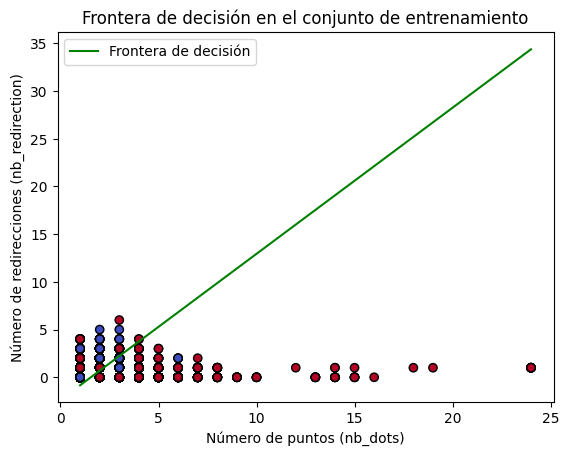

In [22]:
# Visualización
plt.scatter(train_data['nb_dots'], train_data['nb_redirection'], c=train_data['status_encoded'], cmap='coolwarm', edgecolors='k')

x_values = [np.min(x_train[:, 1]), np.max(x_train[:, 1])]  # Rango de valores para nb_dots
y_values = -(theta[0] + theta[1] * np.array(x_values)) / theta[2]  # nb_redirection

plt.plot(x_values, y_values, label='Frontera de decisión', color='green')

plt.xlabel('Número de puntos (nb_dots)')
plt.ylabel('Número de redirecciones (nb_redirection)')
plt.legend()
plt.title('Frontera de decisión en el conjunto de entrenamiento')
plt.show()

## Justificación

Se escogió el accuracy como métrica de desempeño para ver que tan bueno fue el aprendizaje del modelo ya que este es un dato fácil de interpretar y al tener una muestra de datos balanceada no hay riesgo de sesgo. 

## Consideraciones

Tengase en cuenta que los parametros de epochs y learning rate pueden hacer que estos valores cambien, sin embargo se considera que los escogidos son los ideales para el tema. Además, solo se están tomando en cuenta dos columnas de todos los datos para probar el aprendizaje y poder graficarlo de forma significativa, estas columnas pueden cambiar y variar los resultados de la gráfica, pero no deberían de alterar la precisión. 

In [25]:
# Versión usando librerias

from sklearn.model_selection import train_test_split

# Seleccionar las variables de interés
X = dataset[['nb_dots', 'nb_redirection']].values
y = dataset['status_encoded'].values

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Imprimir los coeficientes aprendidos
print("Intercepto (theta_0):", model.intercept_)
print("Coeficientes (theta_1 y theta_2):", model.coef_)


Intercepto (theta_0): [-1.15837235]
Coeficientes (theta_1 y theta_2): [[ 0.48128992 -0.00117207]]


In [30]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Precisión del modelo: {accuracy:.2f}%")


Precisión del modelo: 0.59


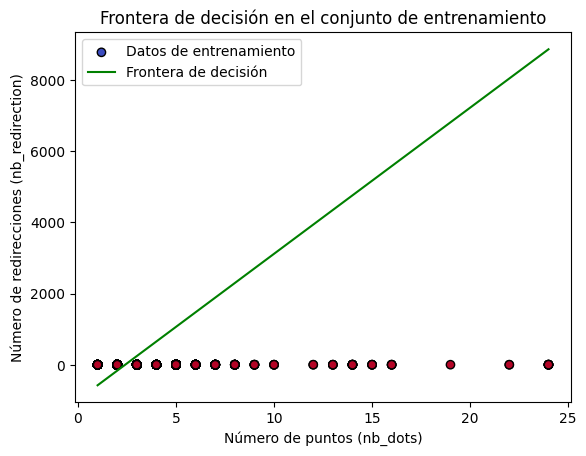

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar los puntos del conjunto de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label='Datos de entrenamiento')

# Calcular la frontera de decisión
x_values = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)  # Rango de nb_dots
y_values = -(model.intercept_ + model.coef_[0, 0] * x_values) / model.coef_[0, 1]  # nb_redirection

# Graficar la frontera
plt.plot(x_values, y_values, label='Frontera de decisión', color='green')

# Etiquetas y leyenda
plt.xlabel('Número de puntos (nb_dots)')
plt.ylabel('Número de redirecciones (nb_redirection)')
plt.legend()
plt.title('Frontera de decisión en el conjunto de entrenamiento')
plt.show()


## Comparación 

Al final podemos ver que ambos tienen una precisión similar aunque siendo mejor para el que utiliza la librería de sklearn. Además, la librería tiene la ventaja de que al estar hecha especificamente para eso y tener más tiempo de creación ofrece multiples formas de medición instantaneas y una mayor escalabilidad de los datos.